In [1]:
import pandas as pd
import numpy as np
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import xgboost as xgb
random_state=0

In [2]:
df= pd.read_csv('energy_data.csv')
df = df.drop('Y2', axis=1) 
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [3]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
# Perform RFE with cross-validation
rfe_cv = RFECV(RandomForestRegressor(n_estimators=100, random_state=0), scoring='neg_mean_absolute_error', cv=10)
rfe_cv.fit(X, y)

# Get the optimal number of features
optimal_n = rfe_cv.n_features_
print('Optimal number of features:', optimal_n)

# Get the mask of selected features
selected_features_mask = rfe_cv.support_

# Print the selected feature names
selected_feature_names = np.array(X.columns)[selected_features_mask]
print("Selected features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features_mask]

X= X_selected


Optimal number of features: 6
Selected features: ['X1' 'X2' 'X3' 'X4' 'X5' 'X7']


In [4]:
X

,X1,X2,X3,X4,X5,X7
0,0.98,514.5,294.0,110.25,7.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4
764,0.62,808.5,367.5,220.50,3.5,0.4
765,0.62,808.5,367.5,220.50,3.5,0.4
766,0.62,808.5,367.5,220.50,3.5,0.4


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Random Forest
start_time_rf = time.time()
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_rf = time.time() - start_time_rf
print("Runtime for Random Forest:", runtime_rf)
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_rf) * -1)
print()


# Decision Tree
start_time_dt = time.time()
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_dt = time.time() - start_time_dt
print("Runtime for Decision Tree:", runtime_dt)
#print("Results for Decision Tree:")
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_dt) * -1)
print()

# K-Nearest Neighbors
start_time_knn = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_knn = time.time() - start_time_knn
print("Runtime for K-Nearest Neighbors:", runtime_knn)
#print("Mean Absolute Error (Train):", np.mean(scores_knn) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_knn) * -1)
print()


# XGBoost
start_time_xgb = time.time()
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_xgb = time.time() - start_time_xgb
print("Runtime for XGBoost:", runtime_xgb)
#print("Mean Absolute Error (Train):", np.mean(scores_xgb) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_xgb) * -1)
print()

Runtime for Random Forest: 2.2516860961914062
Mean Absolute Error (Test): 0.5869732432425201

Runtime for Decision Tree: 0.04498744010925293
Mean Absolute Error (Test): 0.5453995138888887

Runtime for K-Nearest Neighbors: 0.026204824447631836
Mean Absolute Error (Test): 1.5234158333333334

Runtime for XGBoost: 882.8274133205414
Mean Absolute Error (Test): 0.4611356396198273



In [6]:
X_train

,X1,X2,X3,X4,X5,X7
603,0.74,686.0,245.0,220.50,3.5,0.40
118,0.76,661.5,416.5,122.50,7.0,0.10
247,0.90,563.5,318.5,122.50,7.0,0.10
157,0.82,612.5,318.5,147.00,7.0,0.10
468,0.66,759.5,318.5,220.50,3.5,0.25
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.40
192,0.98,514.5,294.0,110.25,7.0,0.10
629,0.90,563.5,318.5,122.50,7.0,0.40
559,0.71,710.5,269.5,220.50,3.5,0.40


In [7]:
X1=X
X1

,X1,X2,X3,X4,X5,X7
0,0.98,514.5,294.0,110.25,7.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4
764,0.62,808.5,367.5,220.50,3.5,0.4
765,0.62,808.5,367.5,220.50,3.5,0.4
766,0.62,808.5,367.5,220.50,3.5,0.4


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-45318dc273e5>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-8-45318dc273e5>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

Runtime for Proposed: 643.1185774803162


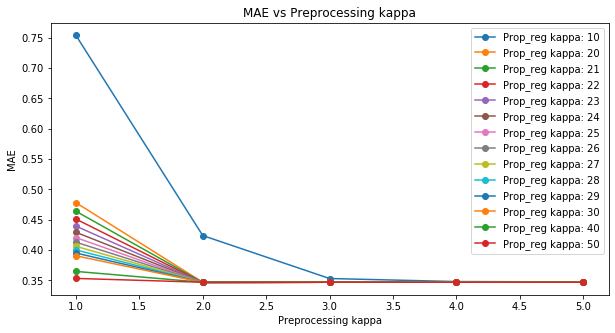

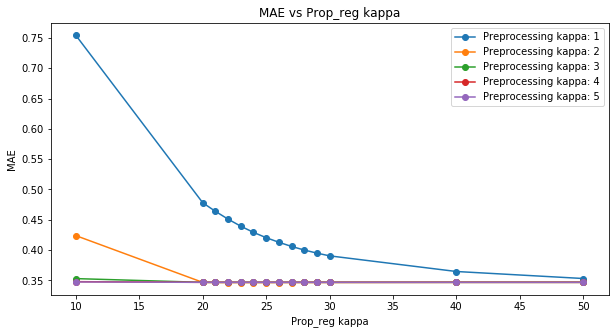

Optimal Preprocessing kappa: 2
Optimal Prop_reg kappa: 24
Minimum MAE: 0.34654207835894146


In [8]:
start_time_pr = time.time()

def normalize(X1):
    result = X1.copy()
    for feature_name in X.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
X

def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



import matplotlib.pyplot as plt


ordinal_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']

kappa_values_preprocessing = [1,2,3,4,5]
kappa_values_prop_reg = [10,20,21,22,23,24,25,26,27,28,29,30,40,50]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)

runtime_pr = time.time() - start_time_pr
print("Runtime for Proposed:", runtime_pr)

# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


In [9]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print(f"Preprocessing kappa: {kappa_preprocessing}, Prop_reg kappa: {kappa_prop_reg}, MAE: {mae}")
    

Kappa combinations and their MAE values:
Preprocessing kappa: 1, Prop_reg kappa: 10, MAE: 0.754075763148843
Preprocessing kappa: 1, Prop_reg kappa: 20, MAE: 0.4780852127586922
Preprocessing kappa: 1, Prop_reg kappa: 21, MAE: 0.46394203269545004
Preprocessing kappa: 1, Prop_reg kappa: 22, MAE: 0.45105723232885764
Preprocessing kappa: 1, Prop_reg kappa: 23, MAE: 0.43943591086564926
Preprocessing kappa: 1, Prop_reg kappa: 24, MAE: 0.4292639452548621
Preprocessing kappa: 1, Prop_reg kappa: 25, MAE: 0.4205318666751937
Preprocessing kappa: 1, Prop_reg kappa: 26, MAE: 0.4129599285787541
Preprocessing kappa: 1, Prop_reg kappa: 27, MAE: 0.4061215450368906
Preprocessing kappa: 1, Prop_reg kappa: 28, MAE: 0.4001629082497872
Preprocessing kappa: 1, Prop_reg kappa: 29, MAE: 0.3950723971215722
Preprocessing kappa: 1, Prop_reg kappa: 30, MAE: 0.39055599491983467
Preprocessing kappa: 1, Prop_reg kappa: 40, MAE: 0.36474428703106104
Preprocessing kappa: 1, Prop_reg kappa: 50, MAE: 0.353184301899504
Prep

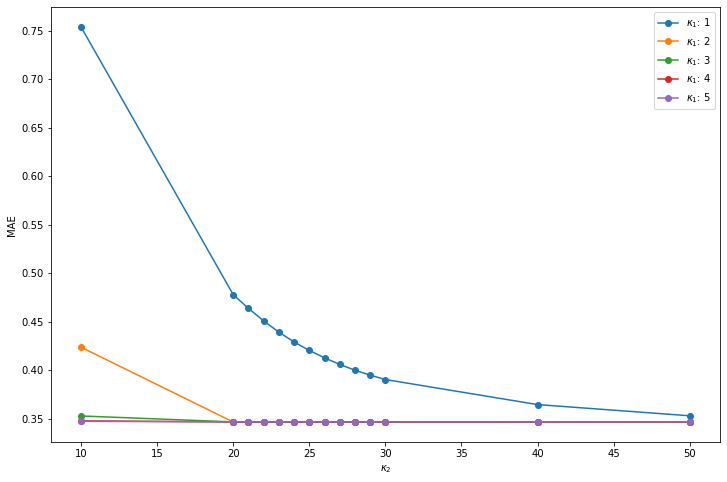

In [12]:
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('energyy1_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()

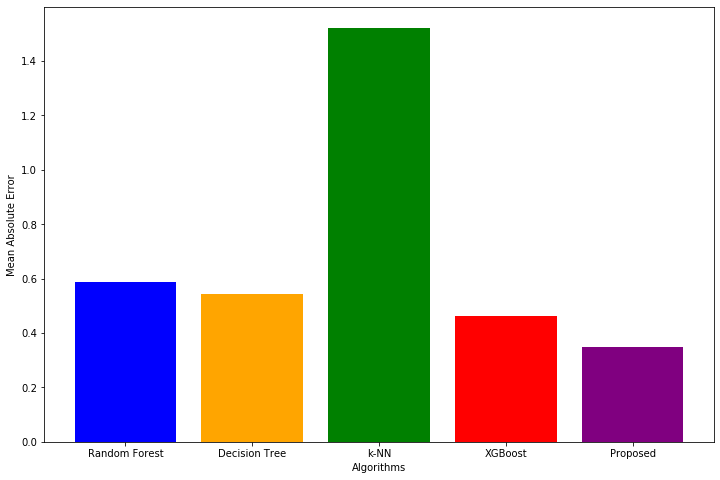

In [11]:
# Results data
results = {
    'Random Forest': 0.587,
    'Decision Tree': 0.545,
    'k-NN': 1.523,
    'XGBoost': 0.461,
    'Proposed': 0.347,
}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Absolute Error')

# Save the plot as a PDF
plt.savefig('energyy1fetureresults_bar_graph.pdf', format='pdf')

# Show the plot
plt.show()